This exercise will require you to pull some data from the Alphavantage API. 

After you register, you will be provided with a unique API key, that you should store:

In [87]:
# Store the API key as a string - according to PEP8, constants are always named in all upper case
API_KEY = ''


While there is a dedicated Python package for connecting to the API, we would prefer that you use the *requests* package, which can be easily downloaded using *pip* or *conda*. You can find the documentation for the package here: http://docs.python-requests.org/en/master/ 

Finally, apart from the *requests* package, you are encouraged to not use any third party Python packages, such as *pandas*, and instead focus on what's available in the Python Standard Library (the *collections* module might come in handy: https://pymotw.com/3/collections/ ).
Also, since you won't have access to DataFrames, you are encouraged to us Python's native data structures - preferably dictionaries, though some questions can also be answered using lists.
You can read more on these data structures here: https://docs.python.org/3/tutorial/datastructures.html

Keep in mind that the JSON responses you will be getting from the API map almost one-to-one to Python's dictionaries. Unfortunately, they can be very nested, so make sure you read up on indexing dictionaries in the documentation provided above.

In [58]:
# First, import the relevant modules
import requests 
import collections

In [92]:
url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=NVDA&apikey=" + API_KEY

These are your tasks for this mini project:

1. Collect data for the ticker Nvidia, from the year 2024-9 to 2025-2 (keep in mind that the date format is YYYY-MM-DD).
2. Convert the returned JSON object into a Python dictionary.
3. Calculate what the highest and lowest opening prices were for the stock in this period.
4. What was the largest change in any one day (based on High and Low price)?
5. What was the largest change between any two days (based on Closing Price)?
6. What was the average daily trading volume during this year?
7. (Optional) What was the median trading volume during this period. (Note: you may need to implement your own function for calculating the median.)

In [98]:
# 1. Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 
#(keep in mind that the date format is YYYY-MM-DD).

data = requests.get(url)

In [100]:
# 2. Convert the returned JSON object into a Python dictionary.
NVDA_dict = data.json()
type(AFX_dict)

dict

In [158]:
# make a line plot of Nvidia daily stock price.
rev_nvda = dict(reversed(list(NVDA_dict['Time Series (Daily)'].items())))

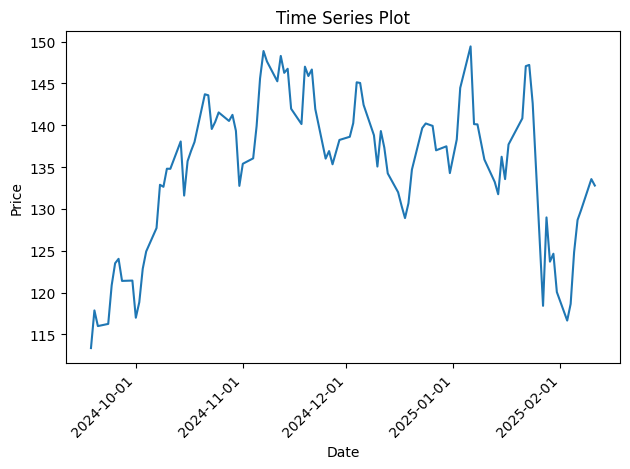

In [207]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
x_value = [datetime.strptime(date, '%Y-%m-%d') for date in list(rev_nvda.keys())]
y_value = [float(i['4. close']) for i in list(rev_nvda.values())]

fig, ax = plt.subplots()
ax.plot(x_value, y_value)

# Format the x-axis to show dates correctly
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.get_xticklabels(), rotation=45, ha="right") # Rotate date labels

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Time Series Plot")

# Show the plot
plt.tight_layout()
plt.show()

In [103]:
NVDA_dict['Time Series (Daily)']['2025-02-11']

{'1. open': '132.5800',
 '2. high': '134.4800',
 '3. low': '131.0200',
 '4. close': '132.8000',
 '5. volume': '178902379'}

In [132]:
# 3. Calculate what the highest and lowest opening prices were for the stock in this period.
nv_daily = NVDA_dict['Time Series (Daily)']
opens = []

for date, value in nv_daily.items(): 
    value = float(value['1. open'])
    if type(value) == float:
        opens.append(value)

high_open = max(opens)
low_open = min(opens)
print('The highest opening price was: $' + str(high_open))
print('The lowest opening price was: $' + str(low_open))
print(len(opens))

The highest opening price was: $153.03
The lowest opening price was: $114.75
100


In [136]:
# 4. What was the largest change in any one day (based on High and Low price)?
price_changes = []

for date, value in nv_daily.items(): 
    value_high = float(value['2. high'])
    value_low = float(value['3. low'])
    if type(value_high) == float and type(value_low) == float:
        change = value_high - value_low
        price_changes.append(change)

print('The largest change in any one day: $' + str(max(price_changes)))
print(len(price_changes))

The largest change in any one day: $13.120000000000005
100


In [227]:
# 5. What was the largest change between any two consecutive days (based on Closing Price)?
dates = []
opens = []
closes = []
date_open_close = []

for date, value in rev_nvda.items(): 
    #gotta make a separate date, open, close array, and then do the i and i-1 analysis
    open_price = float(value['1. open'])
    close_price = float(value['4. close'])
    
    dates.append(date)
    opens.append(open_price)
    closes.append(close_price)

date_open_close = [dates, opens, closes]

In [229]:
daily_changes = []

for i in range(len(dates)):
    if i != 0:
        d_change = opens[i] - closes[i-1]
        daily_changes.append(d_change)
        
print('The largest change between any two days was: $' + str(max(daily_changes)))

The largest change between any two days was: $4.1200000000000045


In [234]:
# 6. What was the average daily trading volume during this year?
traded_volumes = []

for date, value in rev_nvda.items(): 
    traded_volumes.append(int(value['5. volume']))
        
avg = sum(traded_volumes) / len(traded_volumes)
print('The average daily trading volume during this year (traded_volumes): ' + str(avg))

The average daily trading volume during this year (traded_volumes): 245628404.12


In [239]:
# 7. (Optional) What was the median trading volume during this year. 
#(Note: you may need to implement your own function for calculating the median.)

s_nvda = sorted(traded_volumes)
median = 0
half = len(s_nvda)/2
if len(s_nvda)%2 != 0:
    median = traded_volumes[int(half) + 1]
else:
    median = (traded_volumes[int(half)] + traded_volumes[int(half)+1])/2
    
print('The median for the traded volume is: ' + str(median))

The median for the traded volume is: 184117034.0
